In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score, confusion_matrix
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [2]:
credit_fraud=pd.read_csv('creditcard.csv')

In [3]:
credit_fraud.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
credit_fraud.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
df_x=credit_fraud.iloc[:,1:30]
df_y=credit_fraud['Class']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_x,df_y, test_size=0.33, random_state=42)

In [13]:
logistic = linear_model.LogisticRegression(class_weight='balanced')
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [18]:
predictions = logistic.predict(X_test)
len(predictions)

93987

In [19]:
count=0
for i in range(len(predictions)):
    if y_test.values[i]==predictions[i]:
        count=count+1
print (count)

91644


In [20]:
print("Accuracy of model is ",count/len(predictions))

Accuracy of model is  0.9750710204602764


In [21]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=True)
print("ROCAUC:", roc_auc_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

ROCAUC: 0.947311202185
[[91507  2331]
 [   12   137]]


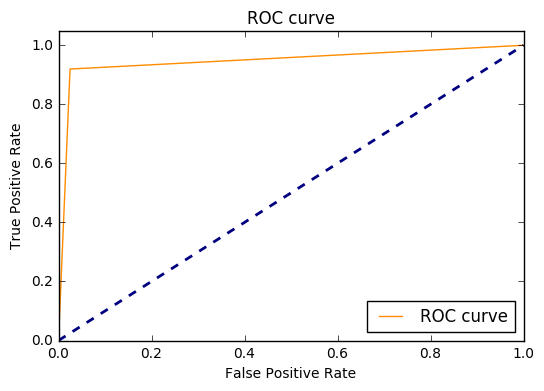

In [24]:
#we can see that under orange line ROC curve is there.It is nothing but the ratio of true positive rates to false positive rate.ROC curve is a part of AUC curve
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="best")
plt.show()